In [2]:
# Importamos librerias 
import pandas as pd
import numpy as np

In [62]:
def df_ratio(y_v, y_m):
    ratio = (y_m/y_v).to_frame(name='Ratio')
    ratio['Desvío Estándar'] = ratio['Ratio'].std()
    ratio['CV'] = ratio['Desvío Estándar']/ratio['Ratio']*100

    ratio['Confiabilidad'] = 'Confiable'
    ratio.loc[(ratio['CV']>=16) & (ratio['CV']<25), 'Confiabilidad'] = 'Poco precisa'
    ratio.loc[ratio['CV']>=25, 'Confiabilidad'] = 'No confiable'

    return ratio


def df_detallado(X, df_input):
    df_input['Count'] = X.count()
    df_input['Desvío Estándar'] = df_input['PONDERA'].std()
    df_input['CV'] = df_input['Desvío Estándar']/df_input['PONDERA']*100

    df_input['Confiabilidad'] = 'Confiable'
    df_input.loc[(df_input['CV']>=16) & (df_input['CV']<25), 'Confiabilidad'] = 'Poco precisa'
    df_input.loc[df_input['CV']>=25, 'Confiabilidad'] = 'No confiable'

    return df_input


In [3]:
pathdata = '/home/daniufundar/Documents/Fundar/indice-desigualdad-genero-fundar/'
pathdata = '/Users/danielarisaro/Documents/fundar/indice-desigualdad-genero/'
pathdata = '/home/daniu/Documentos/fundar/indice-desigualdad-genero/'

df_people = pd.read_csv(pathdata + 'data_input/personas_tot.urb_3T_21.txt', delimiter=';', low_memory=False)
df_homes = pd.read_csv(pathdata + 'data_input/hogar_tot.urb_3T_2021.txt', delimiter=';', low_memory=False)

In [4]:
# Defino diccionarios

dict_provinces = {2: "Ciudad de Buenos Aires",
 6: "Buenos Aires",
 10: "Catamarca",
 14: "Córdoba",
 18: "Corrientes",
 22: "Chaco",
 26: "Chubut",
 30: "Entre Ríos",
 34: "Formosa",
 38: "Jujuy",
 42: "La Pampa",
 46: "La Rioja",
 50: "Mendoza",
 54: "Misiones",
 58: "Neuquén",
 62: "Río Negro",
 66: "Salta",
 70: "San Juan",
 74: "San Luis",
 78: "Santa Cruz",
 82: "Santa Fe",
 86: "Santiago del Estero",
 90: "Tucumán",
 94: "Tierra del Fuego"}
 
 #CH04
dict_gender = {1: 'Varon', 2: 'Mujer'}

#ESTADO
dict_work_condition = {0: 'Entrevista individual no realizada',    
                    1: 'Ocupado', 
                    2: 'Desocupado', 
                    3: 'Inactivo', 
                    4: 'Menor de 10 anios'}

#CAT_OCUP
dict_work_category = {0: ' ',      
                    1: 'Patron', 
                    2: 'Cuenta propia', 
                    3: 'Obrero o empleado', 
                    4: 'Trabajador familiar sin remuneracion', 
                    9: 'NS/NC'}

#PP07H
dict_retirement = {0: '', 1: 'Con descuento jubilatorio', 2: 'Sin descuento jubilatorio'}

#CH10
dict_studies = {0: ' ', 
                1: 'Si, asiste', 
                2: 'No asiste, pero asistio', 
                3: 'Nunca asistio', 
                9: ' '}

In [5]:
df_people['Province'] = df_people['PROVINCIA'].copy().replace(dict_provinces)

In [6]:
df_adults = df_people.query('CH06 >= 16 & CH06 < 65')

# Insercion laboral

## Tasa de empleo

### Tasas según género

$X = PONDERA$ 

$provincia = p(k), \, k \in \{1, ..., 24 \}$

$sexo = CH04, sexo(j) = i, \, i \in \{1, 2 \}$

$edad = CH06, edad(j)$

$cond\_lab = ESTADO, cond\_lab(j)$

$S^{'}_{k,i} = \{j \in {1,..., N} \, / \, cond\_lab(j)=1, 16 \leq edad(j) \lt 65, \, provincia=p(k), \, sexo(j)=i \}$

$N^{'}_{k,i} = \{j \in {1,..., N} \, / \,16 \leq edad(j) \lt 65, \, provincia=p(k), \, sexo(j)=i \}$

$T_{empleo}(k,i) = \dfrac{\sum\limits_{j \in S^{'}_{k,i}} X(j)}{\sum\limits_{j \in N^{'}_{k,i}} X(j)}$

In [64]:
numerador = df_adults[df_adults['ESTADO']==1].groupby(['CH04', 'Province'])['PONDERA'].sum()
denominador = df_adults.groupby(['CH04', 'Province'])['PONDERA'].sum()

df_tasa_empleo = (numerador / denominador).to_frame()
X = df_adults[df_adults['ESTADO']==1].groupby(['CH04', 'Province'])['PONDERA']
df_tasa_empleo = df_detallado(X, df_tasa_empleo)
display(df_tasa_empleo)

PONDERA  Count  Desvío Estándar         CV  \
CH04 Province                                                              
1    Buenos Aires            0.752414   2122          0.12099  16.080231   
     Catamarca               0.675879    666          0.12099  17.901137   
     Chaco                   0.698742    481          0.12099  17.315409   
     Chubut                  0.721604    758          0.12099  16.766805   
     Ciudad de Buenos Aires  0.761669    282          0.12099  15.884846   
     Corrientes              0.712329    572          0.12099  16.985113   
     Córdoba                 0.766081   1194          0.12099  15.793371   
     Entre Ríos              0.707523    913          0.12099  17.100489   
     Formosa                 0.584053    486          0.12099  20.715563   
     Jujuy                   0.725616    822          0.12099  16.674111   
     La Pampa                0.696808    275          0.12099  17.363461   
     La Rioja                0.768269    720          0.12099  15.748380   
     Mendoza                 0.779508    789          0.12099  15.521320   
     Misiones                0.751127    591          0.12099  16.107783   
     Neuquén                 0.728123    540          0.12099  16.616689   
     Río Negro               0.753327    677          0.12099  16.060742   
     Salta                   0.720340    968          0.12099  16.796218   
     San Juan                0.744260    748          0.12099  16.256408   
     San Luis                0.756638    701          0.12099  15.990467   
     Santa Cruz              0.707955    357          0.12099  17.090067   
     Santa Fe                0.765456   1196          0.12099  15.806266   
     Santiago del Estero     0.740249    763          0.12099  16.344491   
     Tierra del Fuego        0.726505    263          0.12099  16.653698   
     Tucumán                 0.695843    838          0.12099  17.387538   
2    Buenos Aires            0.539305   1709          0.12099  22.434441   
     Catamarca               0.505624    504          0.12099  23.928823   
     Chaco                   0.449773    365          0.12099  26.900223   
     Chubut                  0.529432    618          0.12099  22.852787   
     Ciudad de Buenos Aires  0.701706    267          0.12099  17.242251   
     Corrientes              0.511123    420          0.12099  23.671402   
     Córdoba                 0.525504    950          0.12099  23.023594   
     Entre Ríos              0.507904    672          0.12099  23.821410   
     Formosa                 0.303131    264          0.12099  39.913438   
     Jujuy                   0.525893    675          0.12099  23.006559   
     La Pampa                0.490578    211          0.12099  24.662729   
     La Rioja                0.528194    537          0.12099  22.906340   
     Mendoza                 0.542274    593          0.12099  22.311591   
     Misiones                0.482403    434          0.12099  25.080674   
     Neuquén                 0.513329    450          0.12099  23.569658   
     Río Negro               0.521357    537          0.12099  23.206733   
     Salta                   0.516169    804          0.12099  23.439985   
     San Juan                0.503848    521          0.12099  24.013203   
     San Luis                0.536541    498          0.12099  22.549997   
     Santa Cruz              0.546338    314          0.12099  22.145625   
     Santa Fe                0.605241    960          0.12099  19.990365   
     Santiago del Estero     0.441004    492          0.12099  27.435085   
     Tierra del Fuego        0.509971    182          0.12099  23.724875   
     Tucumán                 0.486480    642          0.12099  24.870513   

                            Confiabilidad  
CH04 Province                              
1    Buenos Aires            Poco precisa  
     Catamarca               Poco precisa  
     Chaco                   Poco precisa  
     Chub

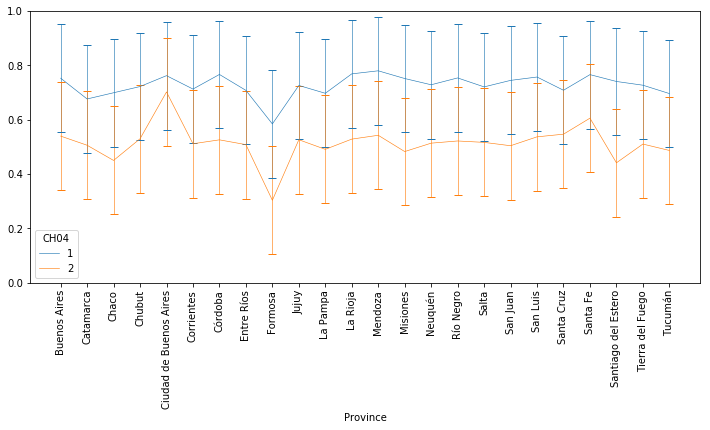

In [26]:
pline = df_tasa_empleo['PONDERA'].unstack(level=0).plot(kind='line', lw=0.6, style='o', ms=7, 
            figsize=(12,5), ylim=(0,1), yerr=df_tasa_empleo['Desvío Estándar'].values[0]*1.64,capsize=4,capthick=1)

pline.set_xticks(range(len(df_tasa_empleo.unstack(level=0))));
pline.set_xticklabels([item for item in df_tasa_empleo.unstack(level=0).index.tolist()], rotation=90);

### Ratio entre mujeres y varones

$X = PONDERA$ 

$provincia = p(k), \, k \in \{1, ..., 24 \}$

$sexo = CH04, sexo(j) = i, \, i \in \{1, 2 \}$

$edad = CH06, edad(j)$

$cond\_lab = ESTADO, cond\_lab(j)$

$M^{'}_{k} = \{j \in {1,..., N} \, / \, cond\_lab(j)=1, 16 \leq edad(j) \lt 65, \, provincia=p(k), \, sexo(j)=2 \}$

$V^{'}_{k} = \{j \in {1,..., N} \, / \, cond\_lab(j)=1, 16 \leq edad(j) \lt 65, \, provincia=p(k), \, sexo(j)=1 \}$

$n^{'}_{m}(k) = \{j \in {1,..., N} \, / \,16 \leq edad(j) \lt 65, \, provincia=p(k), \, sexo(j)=2 \}$

$n^{'}_{v}(k) = \{j \in {1,..., N} \, / \,16 \leq edad(j) \lt 65, \, provincia=p(k), \, sexo(j)=1 \}$


$R_{empleo}(k,i) = \dfrac{\sum\limits_{j \in M^{'}_{k}} X(j)}{n_m(k)} \Bigg(\dfrac{\sum\limits_{j \in V^{'}_{k}} X(j)}{n_v(k)} \Bigg)^{-1}$

In [59]:
numerador = df_adults[df_adults['ESTADO']==1].groupby(['CH04', 'Province'])['PONDERA'].sum()
denominador = df_adults.groupby(['CH04', 'Province'])['PONDERA'].sum()

df_tasa_empleo = (numerador / denominador).to_frame()

y_m = df_tasa_empleo.loc[2,'PONDERA']
y_v = df_tasa_empleo.loc[1,'PONDERA']

ratio_tasa_empleo = df_ratio(y_v, y_m)
display(ratio_tasa_empleo)

,Ratio,Desvío Estándar,CV,Confiabilidad
Province,,,,
Buenos Aires,0.716765,0.071696,10.002742,Confiable
Catamarca,0.748099,0.071696,9.583779,Confiable
Chaco,0.643690,0.071696,11.138308,Confiable
Chubut,0.733688,0.071696,9.772033,Confiable
Ciudad de Buenos Aires,0.921274,0.071696,7.782283,Confiable
Corrientes,0.717537,0.071696,9.991982,Confiable
Córdoba,0.685965,0.071696,10.451879,Confiable
Entre Ríos,0.717862,0.071696,9.987459,Confiable
Formosa,0.519012,0.071696,13.813969,Confiable


## Brecha en tasa de desempleo


$X = PONDERA$ 

$provincia = p(k), \, k \in \{1, ..., 24 \}$

$sexo = CH04, sexo(j) = i, \, i \in \{1, 2 \}$

$edad = CH06, edad(j)$

$cond\_lab = ESTADO, cond\_lab(j)$

$S^{'}_{k,i} = \{j \in {1,..., N} \, / \, cond\_lab(j)=2, 16 \leq edad(j) \lt 65, \, provincia=p(k), \, sexo(j)=i \}$

$N^{'}_{k,i} = \{j \in {1,..., N} \, / \,16 \leq edad(j) \lt 65, \, provincia=p(k), \, sexo(j)=i \}$

$T_{desempleo}(k,i) = \dfrac{\sum\limits_{j \in S^{'}_{k,i}} X(j)}{\sum\limits_{j \in N^{'}_{k,i}} X(j)}$

In [27]:
numerador = df_adults[df_adults['ESTADO']==2].groupby(['CH04', 'Province'])['PONDERA'].sum()
denominador = df_adults.groupby(['CH04', 'Province'])['PONDERA'].sum()

df_tasa_desempleo = (numerador / denominador).to_frame()
df_tasa_desempleo['Count'] = df_adults[df_adults['ESTADO']==2].groupby(['CH04', 'Province'])['PONDERA'].count()
df_tasa_desempleo['Desvío Estándar'] = df_tasa_desempleo['PONDERA'].std()
df_tasa_desempleo['CV'] = df_tasa_desempleo['Desvío Estándar']/df_tasa_desempleo['PONDERA']*100

df_tasa_desempleo['Confiabilidad'] = 'Confiable'
df_tasa_desempleo.loc[(df_tasa_desempleo['CV']>=16) & (df_tasa_desempleo['CV']<25), 'Confiabilidad'] = 'Poco precisa'
df_tasa_desempleo.loc[df_tasa_desempleo['CV']>=25, 'Confiabilidad'] = 'No confiable'

display(df_tasa_desempleo)

PONDERA  Count  Desvío Estándar          CV  \
CH04 Province                                                               
1    Buenos Aires            0.064771    157         0.017952   27.716108   
     Catamarca               0.028459     33         0.017952   63.081168   
     Chaco                   0.052137     36         0.017952   34.432395   
     Chubut                  0.047705     55         0.017952   37.631123   
     Ciudad de Buenos Aires  0.067560     23         0.017952   26.572169   
     Corrientes              0.039256     26         0.017952   45.731231   
     Córdoba                 0.069001    111         0.017952   26.017026   
     Entre Ríos              0.047245     60         0.017952   37.998198   
     Formosa                 0.051971     42         0.017952   34.542828   
     Jujuy                   0.023754     31         0.017952   75.575434   
     La Pampa                0.068636     31         0.017952   26.155390   
     La Rioja                0.028853     27         0.017952   62.218359   
     Mendoza                 0.054482     50         0.017952   32.950558   
     Misiones                0.034486     29         0.017952   52.056120   
     Neuquén                 0.054650     41         0.017952   32.849086   
     Río Negro               0.033374     25         0.017952   53.791287   
     Salta                   0.050860     75         0.017952   35.297430   
     San Juan                0.041480     34         0.017952   43.278812   
     San Luis                0.032709     31         0.017952   54.884632   
     Santa Cruz              0.045512     22         0.017952   39.444790   
     Santa Fe                0.049939     82         0.017952   35.947863   
     Santiago del Estero     0.031083     38         0.017952   57.755888   
     Tierra del Fuego        0.036392     12         0.017952   49.329452   
     Tucumán                 0.066940     79         0.017952   26.818235   
2    Buenos Aires            0.062121    171         0.017952   28.898725   
     Catamarca               0.035064     32         0.017952   51.197951   
     Chaco                   0.032389     31         0.017952   55.425889   
     Chubut                  0.026286     37         0.017952   68.294270   
     Ciudad de Buenos Aires  0.042267     19         0.017952   42.473598   
     Corrientes              0.014408     13         0.017952  124.600931   
     Córdoba                 0.095488    131         0.017952   18.800429   
     Entre Ríos              0.061712     60         0.017952   29.090028   
     Formosa                 0.011660     12         0.017952  153.959113   
     Jujuy                   0.032481     42         0.017952   55.270200   
     La Pampa                0.067542     21         0.017952   26.578983   
     La Rioja                0.023862     20         0.017952   75.234424   
     Mendoza                 0.065349     69         0.017952   27.470927   
     Misiones                0.033766     28         0.017952   53.165579   
     Neuquén                 0.051544     43         0.017952   34.828474   
     Río Negro               0.031330     31         0.017952   57.299481   
     Salta                   0.045817     65         0.017952   39.181925   
     San Juan                0.026736     31         0.017952   67.146997   
     San Luis                0.014950     20         0.017952  120.078638   
     Santa Cruz              0.020806     14         0.017952   86.283800   
     Santa Fe                0.058021    107         0.017952   30.940449   
     Santiago del Estero     0.017804     21         0.017952  100.831932   
     Tierra del Fuego        0.027182      9         0.017952   66.044300   
     Tucumán                 0.050733     68         0.017952   35.385698   

                            Confiabilidad  
CH04 Province                              
1    Buenos Aires            No confiable  
     Catamarca               No confiable  
   

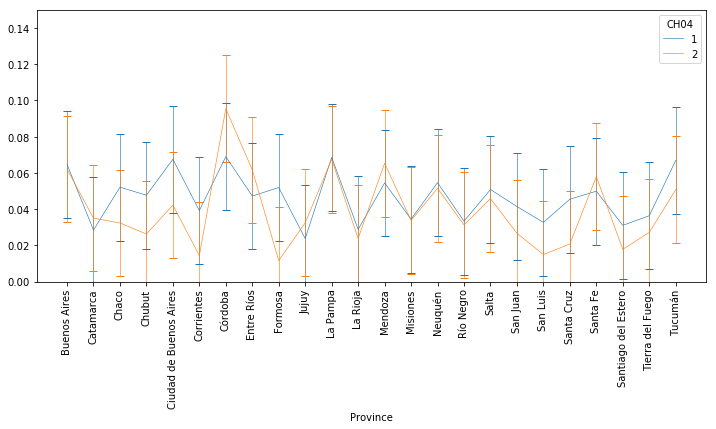

In [36]:
pline = df_tasa_desempleo['PONDERA'].unstack(level=0).plot(kind='line', lw=0.6, style='o', ms=7, 
            figsize=(12,5), ylim=(0,0.15), yerr=df_tasa_desempleo['Desvío Estándar'].values[0]*1.64,capsize=4,capthick=1)

pline.set_xticks(range(len(df_tasa_desempleo.unstack(level=0))));
pline.set_xticklabels([item for item in df_tasa_desempleo.unstack(level=0).index.tolist()], rotation=90);

In [60]:
y_m = df_tasa_desempleo.loc[2,'PONDERA']
y_v = df_tasa_desempleo.loc[1,'PONDERA']

ratio_tasa_desempleo = df_ratio(y_v, y_m)
display(ratio_tasa_desempleo)

,Ratio,Desvío Estándar,CV,Confiabilidad
Province,,,,
Buenos Aires,0.959077,0.32668,34.061895,No confiable
Catamarca,1.232103,0.32668,26.513998,No confiable
Chaco,0.621233,0.32668,52.585717,No confiable
Chubut,0.551014,0.32668,59.286996,No confiable
Ciudad de Buenos Aires,0.625616,0.32668,52.217300,No confiable
Corrientes,0.367022,0.32668,89.008350,No confiable
Córdoba,1.383853,0.32668,23.606547,Poco precisa
Entre Ríos,1.306228,0.32668,25.009413,No confiable
Formosa,0.224364,0.32668,145.602847,No confiable


## Brecha en tasa de informalidad


$X = PONDERA$ 

$provincia = p(k), \, k \in \{1, ..., 24 \}$

$sexo = CH04, sexo(j) = i, \, i \in \{1, 2 \}$

$edad = CH06, edad(j)$

$desc\_jub = PP07H, desc\_jub(j)$

$cond\_lab = ESTADO, cond\_lab(j)$

$cat\_ocup = CAT\_OCUP, cat\_ocup(j)$

$S^{'}_{k,i} = \{j \in {1,..., N} \, / \, cond\_lab(j)=1, \, desc\_jub(j)=2, \, cat\_ocup(j)=3, \,16 \leq edad(j) \lt 65, \, provincia=p(k), \, sexo(j)=i \}$

$N^{'}_{k,i} = \{j \in {1,..., N} \, / \,cond\_lab(j)=1, \, cat\_ocup(j)=3, \,16 \leq edad(j) \lt 65, \, provincia=p(k), \, sexo(j)=i \}$

$T_{informalidad}(k,i) = \dfrac{\sum\limits_{j \in S^{'}_{k,i}} X(j)}{\sum\limits_{j \in N^{'}_{k,i}} X(j)}$

In [31]:
numerador = df_adults[(df_adults['ESTADO']==1) & (df_adults['CAT_OCUP']==3) & (df_adults['PP07H']==2)].groupby(['CH04', 'Province'])['PONDERA'].sum()
denominador = df_adults[(df_adults['ESTADO']==1) & (df_adults['CAT_OCUP']==3)].groupby(['CH04', 'Province'])['PONDERA'].sum()

df_tasa_informalidad = (numerador / denominador).to_frame()
df_tasa_informalidad['Count'] = df_adults[(df_adults['ESTADO']==1) & (df_adults['CAT_OCUP']==3) & (df_adults['PP07H']==2)].groupby(['CH04', 'Province'])['PONDERA'].count()
df_tasa_informalidad['Desvío Estándar'] = df_tasa_informalidad['PONDERA'].std()
df_tasa_informalidad['CV'] = df_tasa_informalidad['Desvío Estándar']/df_tasa_informalidad['PONDERA']*100

df_tasa_informalidad['Confiabilidad'] = 'Confiable'
df_tasa_informalidad.loc[(df_tasa_informalidad['CV']>=16) & (df_tasa_informalidad['CV']<25), 'Confiabilidad'] = 'Poco precisa'
df_tasa_informalidad.loc[df_tasa_informalidad['CV']>=25, 'Confiabilidad'] = 'No confiable'

display(df_tasa_informalidad)

PONDERA  Count  Desvío Estándar          CV  \
CH04 Province                                                               
1    Buenos Aires            0.311732    450         0.110479   35.440396   
     Catamarca               0.384212    200         0.110479   28.754719   
     Chaco                   0.549308    157         0.110479   20.112449   
     Chubut                  0.219521    131         0.110479   50.327418   
     Ciudad de Buenos Aires  0.189052     43         0.110479   58.438611   
     Corrientes              0.465163    180         0.110479   23.750654   
     Córdoba                 0.430085    334         0.110479   25.687757   
     Entre Ríos              0.319938    215         0.110479   34.531395   
     Formosa                 0.502589    169         0.110479   21.982011   
     Jujuy                   0.468908    266         0.110479   23.560938   
     La Pampa                0.328552     60         0.110479   33.626081   
     La Rioja                0.347056    178         0.110479   31.833268   
     Mendoza                 0.408345    226         0.110479   27.055349   
     Misiones                0.429750    156         0.110479   25.707768   
     Neuquén                 0.226473     87         0.110479   48.782417   
     Río Negro               0.273773    124         0.110479   40.354281   
     Salta                   0.472092    312         0.110479   23.402041   
     San Juan                0.431471    242         0.110479   25.605233   
     San Luis                0.373703    202         0.110479   29.563401   
     Santa Cruz              0.149224     49         0.110479   74.035725   
     Santa Fe                0.324634    252         0.110479   34.031938   
     Santiago del Estero     0.443407    220         0.110479   24.915992   
     Tierra del Fuego        0.084980     17         0.110479  130.006310   
     Tucumán                 0.456056    277         0.110479   24.224938   
2    Buenos Aires            0.364517    436         0.110479   30.308386   
     Catamarca               0.357519    135         0.110479   30.901599   
     Chaco                   0.440418    119         0.110479   25.085097   
     Chubut                  0.285074    140         0.110479   38.754597   
     Ciudad de Buenos Aires  0.234638     46         0.110479   47.085001   
     Corrientes              0.477461    122         0.110479   23.138890   
     Córdoba                 0.482012    297         0.110479   22.920410   
     Entre Ríos              0.370000    192         0.110479   29.859205   
     Formosa                 0.460950     92         0.110479   23.967706   
     Jujuy                   0.447918    191         0.110479   24.665063   
     La Pampa                0.328766     56         0.110479   33.604207   
     La Rioja                0.316095    134         0.110479   34.951310   
     Mendoza                 0.441255    181         0.110479   25.037507   
     Misiones                0.472650    141         0.110479   23.374422   
     Neuquén                 0.331488    119         0.110479   33.328277   
     Río Negro               0.247642    100         0.110479   44.612423   
     Salta                   0.530937    251         0.110479   20.808344   
     San Juan                0.438732    159         0.110479   25.181500   
     San Luis                0.474483    172         0.110479   23.284099   
     Santa Cruz              0.234715     55         0.110479   47.069504   
     Santa Fe                0.380833    251         0.110479   29.009908   
     Santiago del Estero     0.479231    173         0.110479   23.053433   
     Tierra del Fuego        0.143509     23         0.110479   76.984359   
     Tucumán                 0.492087    227         0.110479   22.451142   

                            Confiabilidad  
CH04 Province                              
1    Buenos Aires            No confiable  
     Catamarca               No confiable  
   

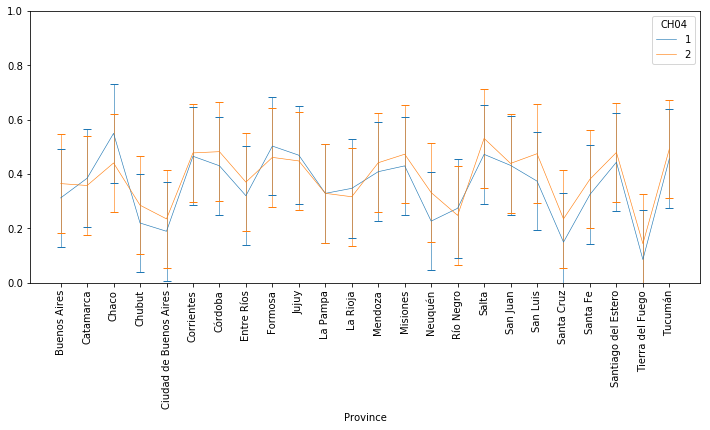

In [38]:
pline = df_tasa_informalidad['PONDERA'].unstack(level=0).plot(kind='line', lw=0.6, style='o', ms=7, figsize=(12,5), ylim=(0,1), 
            yerr=df_tasa_informalidad['Desvío Estándar'].values[0]*1.64,capsize=4,capthick=1)

pline.set_xticks(range(len(df_tasa_informalidad.unstack(level=0))));
pline.set_xticklabels([item for item in df_tasa_informalidad.unstack(level=0).index.tolist()], rotation=90);

In [61]:
y_m = df_tasa_informalidad.loc[2,'PONDERA']
y_v = df_tasa_informalidad.loc[1,'PONDERA']

ratio_tasa_informalidad = df_ratio(y_v, y_m)
display(ratio_tasa_informalidad)

,Ratio,Desvío Estándar,CV,Confiabilidad
Province,,,,
Buenos Aires,1.169326,0.214177,18.316254,Poco precisa
Catamarca,0.930525,0.214177,23.016762,Poco precisa
Chaco,0.801769,0.214177,26.713035,No confiable
Chubut,1.298618,0.214177,16.492671,Poco precisa
Ciudad de Buenos Aires,1.241130,0.214177,17.256595,Poco precisa
Corrientes,1.026439,0.214177,20.866008,Poco precisa
Córdoba,1.120737,0.214177,19.110348,Poco precisa
Entre Ríos,1.156474,0.214177,18.519810,Poco precisa
Formosa,0.917151,0.214177,23.352397,Poco precisa


## Brecha de horas trabajadas remunerdas

$X = PONDERA$ 

$provincia = p(k), \, k \in \{1, ..., 24 \}$

$sexo = CH04, sexo(j) = i, \, i \in \{1, 2 \}$

$edad = CH06, edad(j)$

$cond\_lab = ESTADO, cond\_lab(j)$

$hrs\_trab = PP3E\_TOT, hrs\_trab(j)$ 

$M^{'}_k = \{j \in {1,..., N} \, / \, \, cond\_lab(j)=1, \, hrs\_trab(j)>0, \, hrs\_trab(j)\neq 999, \,16 \leq edad(j) \lt 65, \, provincia=p(k), \, sexo(j)=2 \}$

$V^{'}_k = \{j \in {1,..., N} \, / \, \,  cond\_lab(j)=1, \, hrs\_trab(j)>0, \, hrs\_trab(j)\neq 999, \,16 \leq edad(j) \lt 65, \, provincia=p(k), \, sexo(j)=1 \}$

$B_{horasTrabajadas}(k) = \dfrac{\sum\limits_{j \in M^{'}_{k}} X(j)}{n_m(k)} \, \Bigg(\dfrac{\sum\limits_{j \in V^{'}_{k}} X(j)}{n_v(k)}\Bigg)^{-1}$

In [40]:
numerador = df_adults[(df_adults['ESTADO']==1) & (df_adults['PP3E_TOT']>0) & (df_adults['PP3E_TOT']!=999) & (df_adults['CH04']==2)].groupby(['Province'])['PONDERA'].mean()

denominador = df_adults[(df_adults['ESTADO']==1) & (df_adults['PP3E_TOT']>0) & (df_adults['PP3E_TOT']!=999) & (df_adults['CH04']==1)].groupby(['Province'])['PONDERA'].mean()

df_horas_trabajadas = (numerador / denominador).to_frame()
df_horas_trabajadas['Count'] =  df_adults[(df_adults['ESTADO']==1) & (df_adults['PP3E_TOT']>0) & (df_adults['PP3E_TOT']!=999) & (df_adults['CH04']==2)].groupby(['Province'])['PONDERA'].count()
df_horas_trabajadas['Desvío Estándar'] = df_horas_trabajadas['PONDERA'].std()
df_horas_trabajadas['CV'] = df_horas_trabajadas['Desvío Estándar']/df_horas_trabajadas['PONDERA']*100

df_horas_trabajadas['Confiabilidad'] = 'Confiable'
df_horas_trabajadas.loc[(df_horas_trabajadas['CV']>=16) & (df_horas_trabajadas['CV']<25), 'Confiabilidad'] = 'Poco precisa'
df_horas_trabajadas.loc[df_horas_trabajadas['CV']>=25, 'Confiabilidad'] = 'No confiable'

display(df_horas_trabajadas)

,PONDERA,Count,Desvío Estándar,CV,Confiabilidad
Province,,,,,
Buenos Aires,0.923037,1632,0.056437,6.114268,Confiable
Catamarca,1.030034,461,0.056437,5.479136,Confiable
Chaco,0.892187,360,0.056437,6.325686,Confiable
Chubut,0.884247,588,0.056437,6.382484,Confiable
Ciudad de Buenos Aires,1.046150,252,0.056437,5.394727,Confiable
Corrientes,1.044336,392,0.056437,5.404097,Confiable
Córdoba,0.893696,909,0.056437,6.315007,Confiable
Entre Ríos,0.928351,648,0.056437,6.079266,Confiable
Formosa,1.003755,263,0.056437,5.622582,Confiable


In [24]:
numerador_count = df_adults[(df_adults['ESTADO']==1) & (df_adults['PP3E_TOT']>0) & (df_adults['PP3E_TOT']!=999) & (df_adults['CH04']==2)].groupby(['Province'])['PONDERA'].count()
denominador_count = df_adults[(df_adults['ESTADO']==1) & (df_adults['PP3E_TOT']>0) & (df_adults['PP3E_TOT']!=999) & (df_adults['CH04']==1)].groupby(['Province'])['PONDERA'].count()

print(numerador_count)
print(denominador_count)

Province
Buenos Aires              1632
Catamarca                  461
Chaco                      360
Chubut                     588
Ciudad de Buenos Aires     252
Corrientes                 392
Córdoba                    909
Entre Ríos                 648
Formosa                    263
Jujuy                      659
La Pampa                   199
La Rioja                   496
Mendoza                    549
Misiones                   417
Neuquén                    430
Río Negro                  518
Salta                      772
San Juan                   500
San Luis                   476
Santa Cruz                 297
Santa Fe                   929
Santiago del Estero        467
Tierra del Fuego           172
Tucumán                    605
Name: PONDERA, dtype: int64
Province
Buenos Aires              2038
Catamarca                  631
Chaco                      474
Chubut                     731
Ciudad de Buenos Aires     273
Corrientes                 548
Córdoba                 

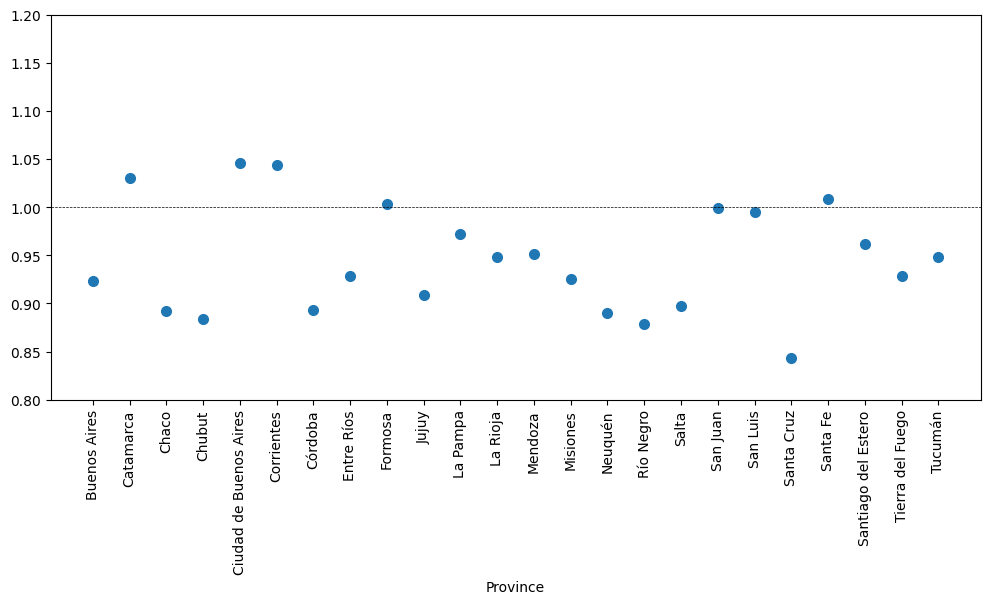

In [25]:
pline = df_horas_trabajadas.plot(kind='line', lw=0.6, style='o', ms=7, figsize=(12,5), ylim=(0.8,1.2))

pline.set_xticks(range(len(df_horas_trabajadas)))
pline.set_xticklabels([item for item in df_horas_trabajadas.index.tolist()], rotation=90)
pline.axhline(y=1, color='black', lw=0.5, linestyle='--')

## Cantidad de horas trabajadas no remuneradas

In [30]:
numerador = df_adults[(df_adults['ESTADO']==1) & (df_adults['PP3E_TOT']>0) & (df_adults['PP3E_TOT']!=999)].groupby(['CH04','Province'])['PP3E_TOT'].mean()

df_cant_horas_trabajadas = numerador

## ver con el pondera

df_cant_horas_trabajadas

CH04  Province              
1     Buenos Aires              41.033857
      Catamarca                 38.522979
      Chaco                     39.841772
      Chubut                    41.291382
      Ciudad de Buenos Aires    38.923077
      Corrientes                40.113139
      Córdoba                   40.662349
      Entre Ríos                42.379464
      Formosa                   41.255230
      Jujuy                     40.641604
      La Pampa                  42.797753
      La Rioja                  36.408104
      Mendoza                   40.804781
      Misiones                  41.836489
      Neuquén                   43.714829
      Río Negro                 40.877458
      Salta                     41.178155
      San Juan                  36.941096
      San Luis                  41.860088
      Santa Cruz                42.224852
      Santa Fe                  41.455959
      Santiago del Estero       42.079408
      Tierra del Fuego          42.856031
     

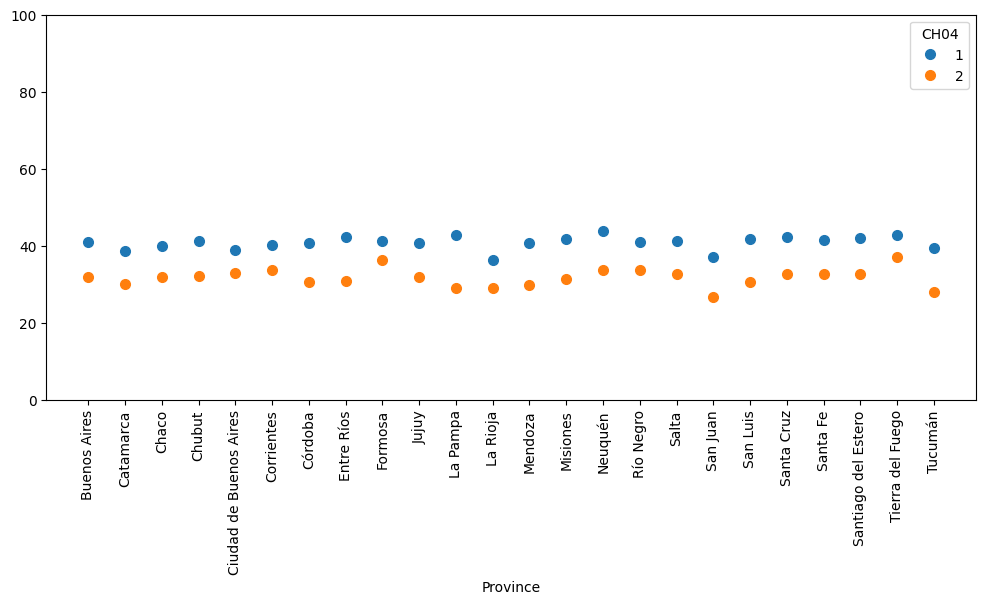

In [32]:
pline = df_cant_horas_trabajadas.unstack(level=0).plot(kind='line', lw=0.6, style='o', ms=7, figsize=(12,5), ylim=(0,100))

pline.set_xticks(range(len(df_cant_horas_trabajadas.unstack(level=0))));
pline.set_xticklabels([item for item in df_cant_horas_trabajadas.unstack(level=0).index.tolist()], rotation=90);

## Brecha de horas trabajadas no remuneradas

No contamos con los datos de la ENUT

# Autonomia economica

## Poblacion dependiente

$X = PONDERA$ 

$Y = PONDII$ 

$provincia = p(k), \, k \in \{1, ..., 24 \}$

$sexo = CH04, sexo(j) = i, \, i \in \{1, 2 \}$

$edad = CH06, edad(j)$

$cond\_lab = ESTADO, cond\_lab(j)$

$ingreso = P47T, ingreso(j)$

$cond\_est = CH10, cond\_est(j)$

$S^{'}_{k,i} = \{j \in {1,..., N} \, / \, cond\_lab(j)=3, \, cond\_est \neq 1, \, ingreso(j)=0, \,16 \leq edad(j) \lt 65, \, provincia=p(k), \, sexo(j)=i \}$

$N^{'}_{k,i} = \{j \in {1,..., N} \, / \, \,16 \leq edad(j) \lt 65, \, provincia=p(k), \, sexo(j)=i \}$

$T_{dependientes}(k,i) = \dfrac{\sum\limits_{j \in S^{'}_{k,i}} Y(j)}{\sum\limits_{j \in N^{'}_{k,i}} X(j)}$

In [33]:
numerador = df_adults[(df_adults['ESTADO']==3) & (df_adults['P47T']==0) & (df_adults['CH10']!=1)].groupby(['CH04','Province'])['PONDII'].sum()

denominador = df_adults.groupby(['CH04','Province'])['PONDERA'].sum()

df_dependientes = numerador / denominador

df_dependientes

CH04  Province              
1     Buenos Aires              0.041602
      Catamarca                 0.066489
      Chaco                     0.071392
      Chubut                    0.035624
      Ciudad de Buenos Aires    0.042684
      Corrientes                0.076072
      Córdoba                   0.026440
      Entre Ríos                0.034163
      Formosa                   0.110529
      Jujuy                     0.046794
      La Pampa                  0.023419
      La Rioja                  0.019667
      Mendoza                   0.023118
      Misiones                  0.032365
      Neuquén                   0.032724
      Río Negro                 0.042799
      Salta                     0.039851
      San Juan                  0.035291
      San Luis                  0.037990
      Santa Cruz                0.039812
      Santa Fe                  0.052423
      Santiago del Estero       0.026811
      Tierra del Fuego          0.041017
      Tucumán               

In [34]:
numerador_count = df_adults[(df_adults['ESTADO']==3) & (df_adults['P47T']==0) & (df_adults['CH10']!=1)].groupby(['CH04','Province'])['PONDII'].count()
numerador_count

CH04  Province              
1     Buenos Aires              126
      Catamarca                  66
      Chaco                      52
      Chubut                     38
      Ciudad de Buenos Aires     15
      Corrientes                 58
      Córdoba                    46
      Entre Ríos                 58
      Formosa                    86
      Jujuy                      49
      La Pampa                   14
      La Rioja                   21
      Mendoza                    22
      Misiones                   28
      Neuquén                    25
      Río Negro                  44
      Salta                      60
      San Juan                   39
      San Luis                   43
      Santa Cruz                 15
      Santa Fe                   61
      Santiago del Estero        30
      Tierra del Fuego           14
      Tucumán                    79
2     Buenos Aires              429
      Catamarca                 110
      Chaco                     124

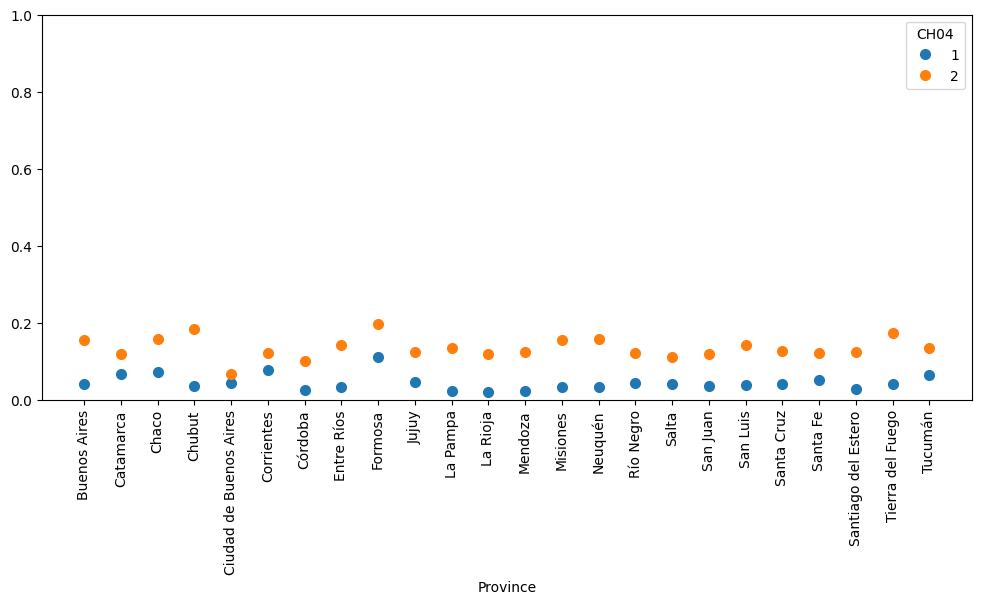

In [35]:
pline = df_dependientes.unstack(level=0).plot(kind='line', lw=0.6, style='o', ms=7, figsize=(12,5), ylim=(0,1))

pline.set_xticks(range(len(df_dependientes.unstack(level=0))))
pline.set_xticklabels([item for item in df_dependientes.unstack(level=0).index.tolist()], rotation=90);

## Brecha de ingreso individual

$Z = PONDIIO$ 

$provincia = p(k), \, k \in \{1, ..., 24 \}$

$sexo = CH04, sexo(j) = i, \, i \in \{1, 2 \}$

$edad = CH06, edad(j)$

$ingreso\_ocup\_ppal = P21, ingreso\_ocup\_ppal(j)$

$S^{'}_{k,i} = \{j \in {1,..., N} \, / \, ingreso\_ocup\_ppal(j)>0, \, ingreso\_ocup\_ppal \neq -9, \,16 \leq edad(j) \lt 65, \, provincia=p(k), \, sexo(j)=i \}$

$N^{'}_k = \{j \in {1,..., N} \, / \, \,16 \leq edad(j) \lt 65, \, provincia=p(k)\}$

$B_{ingrInd}(k) = \dfrac{\sum\limits_{j \in S^{'}_{k,i=2}} Z(j)}{n_m(k)} \Bigg( \dfrac{\sum\limits_{j \in S^{'}_{k,i=1}} Z(j)}{n_v(k)}\Bigg)^{-1}$

In [37]:
media_mujeres = df_adults[(df_adults['CH04']==2) & (df_adults['P21']!=-9) & (df_adults['P21']>0)].groupby(['Province'])['PONDIIO'].mean()

media_varones = df_adults[(df_adults['CH04']==1) & (df_adults['P21']!=-9) & (df_adults['P21']>0)].groupby(['Province'])['PONDIIO'].mean()

df_brecha_ingreso_individual = media_mujeres / media_varones

df_brecha_ingreso_individual

Province
Buenos Aires              0.864105
Catamarca                 1.036815
Chaco                     0.864003
Chubut                    0.864467
Ciudad de Buenos Aires    0.999572
Corrientes                1.051110
Córdoba                   0.868569
Entre Ríos                0.959936
Formosa                   1.050899
Jujuy                     0.914018
La Pampa                  0.798751
La Rioja                  0.936961
Mendoza                   0.903871
Misiones                  0.923907
Neuquén                   0.824493
Río Negro                 0.871956
Salta                     0.888126
San Juan                  1.001210
San Luis                  0.937137
Santa Cruz                0.813648
Santa Fe                  0.919529
Santiago del Estero       0.954039
Tierra del Fuego          0.981003
Tucumán                   0.944865
Name: PONDIIO, dtype: float64

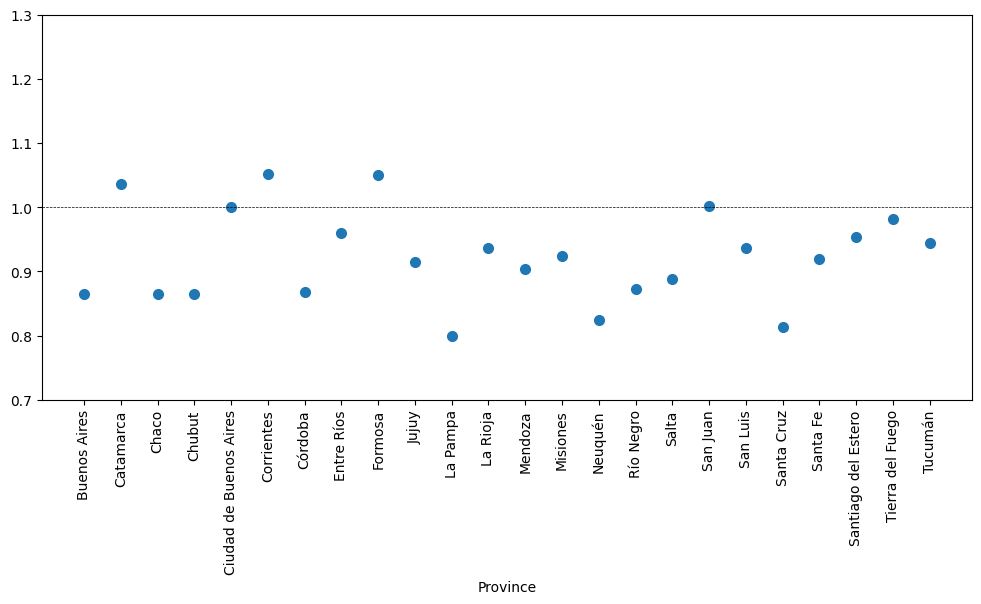

In [41]:
pline = df_brecha_ingreso_individual.plot(kind='line', lw=0.6, style='o', ms=7, figsize=(12,5), ylim=(0.7,1.3))

pline.set_xticks(range(len(df_brecha_ingreso_individual)))
pline.set_xticklabels([item for item in df_brecha_ingreso_individual.index.tolist()], rotation=90)
pline.axhline(y=1, color='black', lw=0.5, linestyle='--')

## Poblacion bajo Linea de Pobreza

$Y = PONDII$ 

$provincia = p(k), \, k \in \{1, ..., 24 \}$

$sexo = CH04, sexo(j) = i, \, i \in \{1, 2 \}$

$ingreso = P47T, ingreso(j)$

$CBT = canasta\_basica\_total(t), \, CBT(t_o) = 119757$

$S^{'}_{k,i} = \{j \in {1,..., N} \, / \, \, ingreso(j) \lt CBT(t_o), \, provincia=p(k), \, sexo(j)=i \}$

$N^{'}_k = \{j \in {1,..., N} \, / \, \, \, provincia=p(k)\}$

$Pob_{pobreza}(k,i) = \dfrac{\sum\limits_{j \in S^{'}_{k,i}} Y(j)}{ \sum\limits_{j \in N^{'}_{k}} Y(j)}$

In [ ]:
CBT = 119757

numerador = df_people[df_people['P47T']<CBT].groupby(['CH04', 'Province'])['PONDII'].sum()

denominador = df_people.groupby(['Province'])['PONDII'].sum()

df_pob_pobreza = numerador / denominador

df_pob_pobreza

In [ ]:
pline = df_pob_pobreza.unstack(level=0).plot(kind='line', lw=0.6, style='o', ms=7, figsize=(12,5), ylim=(0,1))

pline.set_xticks(range(len(df_pob_pobreza.unstack(level=0))))
pline.set_xticklabels([item for item in df_pob_pobreza.unstack(level=0).index.tolist()], rotation=90);

In [ ]:
## Exporto dataframes

with pd.ExcelWriter(pathdata + '/data_output/Indicadores_mercado_de_trabajo.xlsx') as writer:
   
    df_tasa_empleo.to_excel(writer, sheet_name="Tasa_empleo")
    df_tasa_desempleo.to_excel(writer, sheet_name="Tasa_desempleo")
    df_tasa_informalidad.to_excel(writer, sheet_name="Tasa_informalidad")
    df_horas_trabajadas.to_excel(writer, sheet_name="Horas_trabajadas")
    df_dependientes.to_excel(writer, sheet_name="Poblacion_dependiente")
    df_brecha_ingreso_individual.to_excel(writer, sheet_name="Brecha_ing_indiv")
    df_pob_pobreza.to_excel(writer, sheet_name="Poblacion_pobreza")